# Trabajo integrador - Parte 2

# Aprendizaje Supervisado

**Nombre**: Luis Pablo Segovia

## Problema de regresión

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [1]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

### Ejemplo de uso

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Vamos a crear un dataset primero.

data = generate_dataset(
    n_samples=1000,
    n_features=5,
    n_informative=2,
    n_targets=1,
    noise=0,
    output='dataframe'
)

## esto nos genera un dataset que contiene 5 features, 2 de los cuales son informativos, y 1 target.

data.head()

,x0,x1,x2,x3,x4,target
0,1.284474,1.454160,-0.841974,-0.333277,-0.174808,152.631582
1,0.735081,-0.396356,1.840410,-1.348120,0.762624,58.874356
2,-0.733345,1.398418,1.787503,0.068332,-0.770198,-35.488948
3,-2.471195,0.203961,-0.658206,1.863180,0.828168,-224.079129
4,-0.238187,2.193578,0.260701,0.763333,-0.776925,28.786825


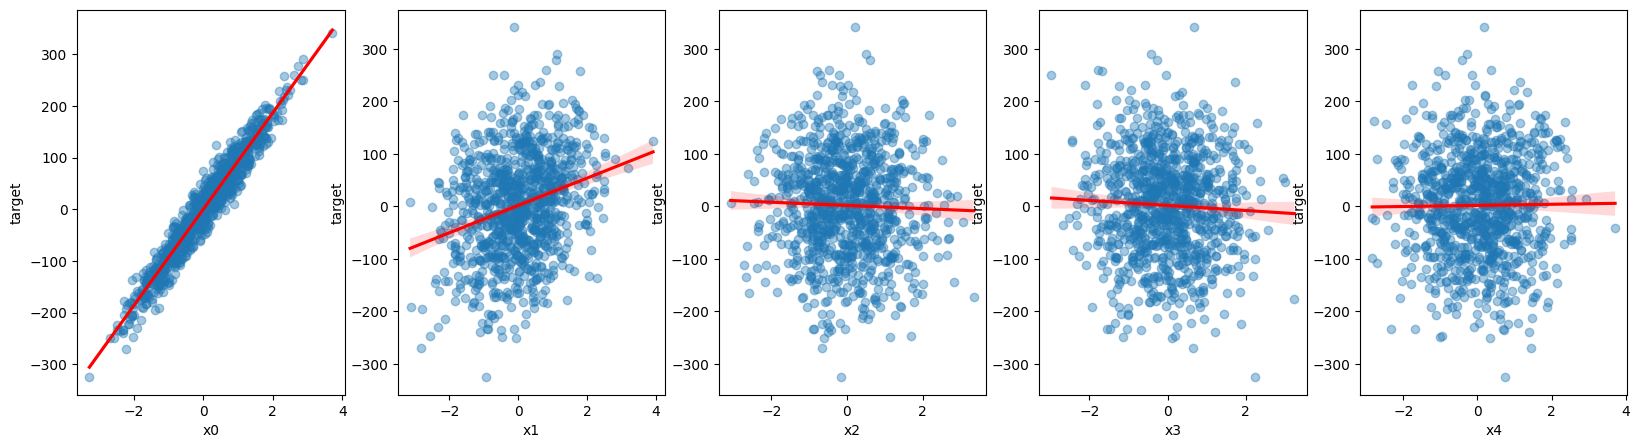

In [4]:
## vamos a visualizar estas variables
## creamos una figura de matplotlib que contenga 5 subplots, uno por cada feature:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

## Creamos un loop para iterar sobre cada feature y graficar la regresión lineal entre cada feature y el target:

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)
    


Ahora agregamos _outliers_ a un nuevo dataset

In [5]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0,
    output='dataframe'
)


In [6]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
)
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=True,
)
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=False,
)

Text(0.5, 1.0, 'Outliers (one-tailed)')

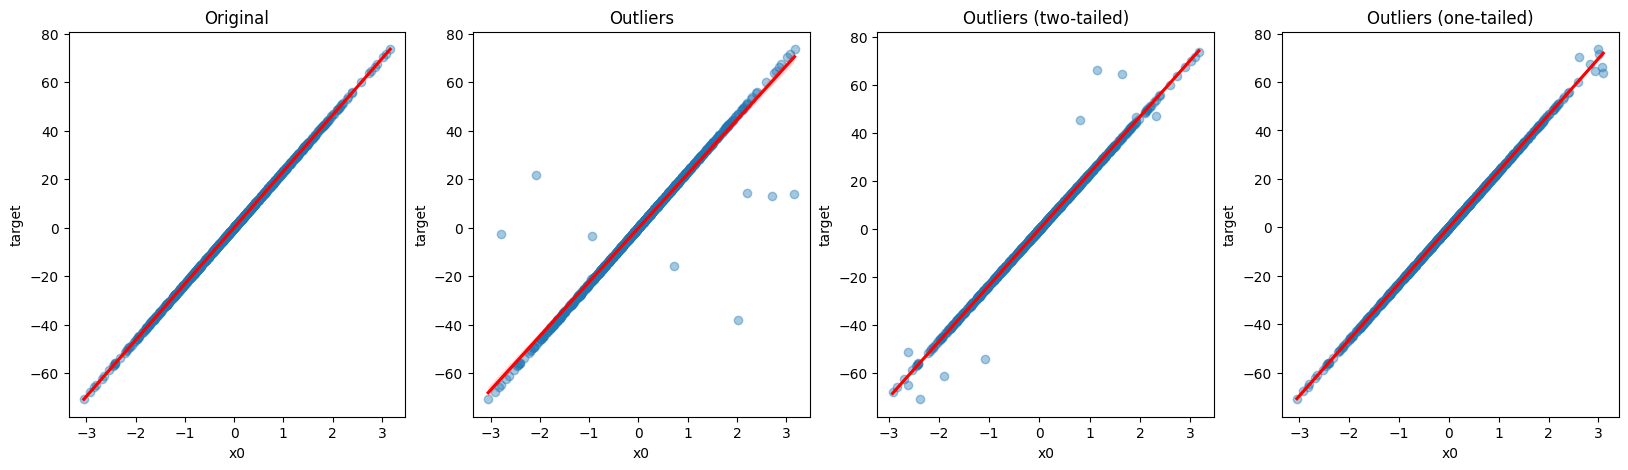

In [7]:
## vamos a visualizar estas los distintos datasets

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

sns.regplot(x='x0',
            y='target',
            data=do2,
            ax=axes[2],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[2].set_title('Outliers (two-tailed)')

sns.regplot(x='x0',
            y='target',
            data=do3,
            ax=axes[3],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[3].set_title('Outliers (one-tailed)')


Text(0.5, 1.0, 'Outliers')

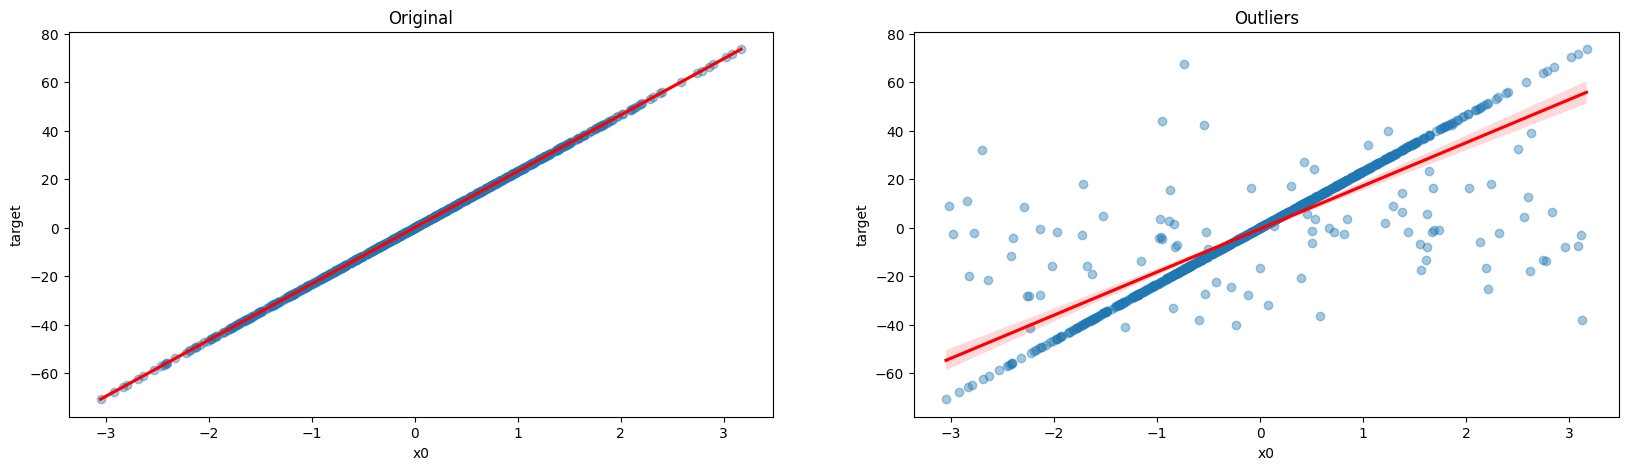

In [8]:
## y si lo queremos con mucho mas outliers?

doe = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)

## vamos a visualizar este caso

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=doe,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')


### Ejercicio 4

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El RMSE de train y test.
- El MAE de train y test. 


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

In [3]:
import numpy as np
from tqdm import tqdm

In [4]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 

In [26]:
## Parámetros de la simulación
n_exp = 100
n_samples = 1000
n_features = 10
n_informative = 2
n_targets = 1

noise = np.linspace(0, 100, 100)
bias = np.linspace(0, 100, 20)

In [27]:
df = pd.DataFrame(columns=['coef1','coef2','coef3','coef4','coef5','coef6','coef7','coef8','coef9','coef10','rmse','mae','bias','noise'])

In [28]:
## Esqueleto de la simulación
for _ in tqdm(range(n_exp)):
    for b in bias:
        for n in noise:
            data = generate_dataset(
                n_samples=n_samples,
                n_features=n_features,
                n_informative=n_informative,
                n_targets=n_targets,
                noise=n,
                bias=b,
                output='dataframe'
            )
            # Definimos X e y del dataset
            X = data.drop('target', axis=1)
            y = data['target']

            # Aplicamos el tran_test_split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=17) # Lo definimos para que sea constante el split

            # Realizamos la regresión lineal
            lin_model = linear_model.LinearRegression()
            lin_model.fit(X_train, y_train)

            # Predecimos el target de test
            y_pred = lin_model.predict(X_test)

            # Calculamos RMSE
            rmse = mean_squared_error(y_test, y_pred)

            # Calculamos MAE
            mae = mean_absolute_error(y_test, y_pred)

            # Generamos la información de cada iteracion
            iter = []
            for coef in lin_model.coef_:
                iter.append(coef)
            iter.append(rmse)
            iter.append(mae)
            iter.append(b)
            iter.append(n)
            df.loc[len(df)] = iter

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [57:35<00:00, 34.55s/it]


In [29]:
df.

,coef1,coef2,coef3,coef4,coef5,coef6,coef7,coef8,coef9,coef10,rmse,mae,bias,noise
0,79.385476,30.290719,1.421085e-14,-2.309264e-14,1.776357e-14,5.329071e-15,4.796163e-14,8.881784e-15,3.552714e-15,4.751755e-14,7.990065e-27,7.198714e-14,0.0,0.000000
1,38.206351,21.659671,-4.529866e-02,-2.176971e-02,-4.333577e-03,7.029132e-03,1.164265e-03,4.675858e-02,2.455369e-04,-4.242797e-02,9.855217e-01,8.227063e-01,0.0,1.010101
2,22.474944,96.470471,4.828147e-02,-2.243665e-02,3.317676e-02,-1.836472e-03,-9.926496e-02,-5.451071e-02,5.811470e-02,-6.485603e-02,3.050125e+00,1.362941e+00,0.0,2.020202
3,13.728267,40.425165,1.500429e-01,3.169901e-02,4.777850e-02,-5.726295e-03,-3.792860e-02,-1.019912e-01,1.094917e-01,-6.850217e-02,1.165846e+01,2.770944e+00,0.0,3.030303
4,18.072801,69.946960,-1.200075e-01,9.393749e-02,-5.292029e-02,2.024318e-02,3.845330e-02,4.820974e-02,1.024998e-01,-3.832552e-02,2.101090e+01,3.565191e+00,0.0,4.040404
5,69.766325,35.653577,3.942644e-02,9.356111e-02,7.039684e-02,-4.142670e-01,-3.289929e-01,-2.257559e-01,-1.020803e-01,-1.150223e-02,2.471744e+01,3.947585e+00,0.0,5.050505
6,91.941366,49.963592,1.543800e-01,-2.292623e-01,-1.092760e-01,6.311209e-02,-5.685595e-02,-2.056109e-01,-8.803538e-02,-9.886412e-02,3.525205e+01,4.596468e+00,0.0,6.060606
7,11.269039,1.603498,-4.018214e-01,5.440090e-02,-3.815577e-01,-1.871337e-01,4.833088e-02,1.722180e-01,2.754310e-01,-3.462929e-01,5.334648e+01,5.883021e+00,0.0,7.070707
8,63.841835,49.348621,3.193093e-01,1.193380e-01,-1.030489e-01,-7.105594e-01,3.635751e-01,-1.516215e-02,-1.808998e-02,3.624840e-01,6.602416e+01,6.387485e+00,0.0,8.080808
9,87.951993,3.869144,-3.204724e-01,6.562914e-01,5.087001e-01,-7.230864e-02,-1.749793e-01,-5.708998e-01,-2.343094e-01,-1.455991e-01,9.532123e+01,7.796244e+00,0.0,9.090909


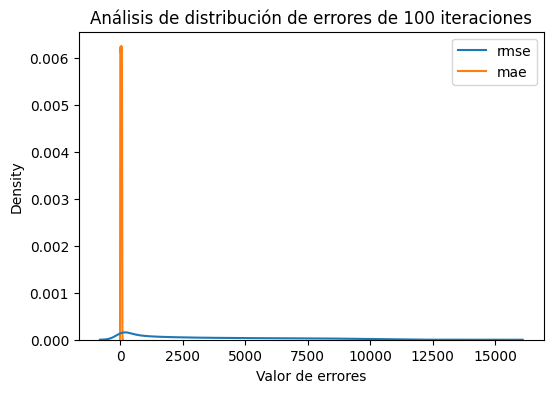

In [30]:
# Analizar distribución de RMSE y MAE
plt.figure(figsize=(6,4))
sns.kdeplot(df[['rmse','mae']])
plt.title(f"Análisis de distribución de errores de {n_exp} iteraciones")
plt.xlabel("Valor de errores")
plt.show()

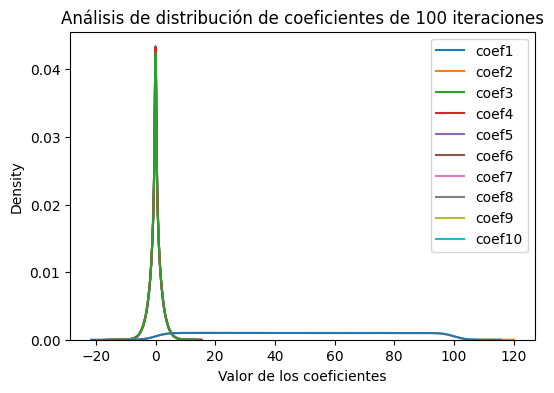

In [51]:
# Analizar distribución de coeficientes
plt.figure(figsize=(6,4))
sns.kdeplot(df[['coef1','coef2','coef3','coef4','coef5','coef6','coef7','coef8','coef9','coef10']])
plt.title(f"Análisis de distribución de coeficientes de {n_exp} iteraciones")
plt.xlabel("Valor de los coeficientes")
plt.show()

## Qué pasa con los coeficientes de las variables no informativas?
- Si tenemos _noise_ fijo, no se modifica la distribución de los errores vs el número de features informativos.
- Si tenemos _noise_ variable, mayor _noise_ implica mayor _RMSE_ (en media) que _MAE_. Aumenta la distancia entre las medias de cada error.
- A mayor _noise_, menor es el valor de _density_ de los errores, lo cual es lógico.
- Cuando aumenta el número de features informativos, la distribución de los coeficientes de las _X_ se vuelven más uniformes.
- Los coeficientes de las variables no informativas, mayormente distribuyen en el _cero_, no importa el _n_informative_.

### Ejercicio 5


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.
2. Generamos outliers fijando `extreme_outliers`.
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

Los modelos a utilizar en este problema son:

    - Regresion Lineal simple
    - Regresion de Huber
    - Regresión Ridge

In [5]:
from sklearn.linear_model import LinearRegression, HuberRegressor, RidgeCV

In [6]:
# Paso 1: Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con noise fijo en 0.5.
data_simple = generate_dataset(n_samples=1000,
                        n_features=1,
                        n_informative=1,
                        n_targets=1,
                        noise=0.5,
                        bias=5, # elijo este bias
                        output='dataframe')

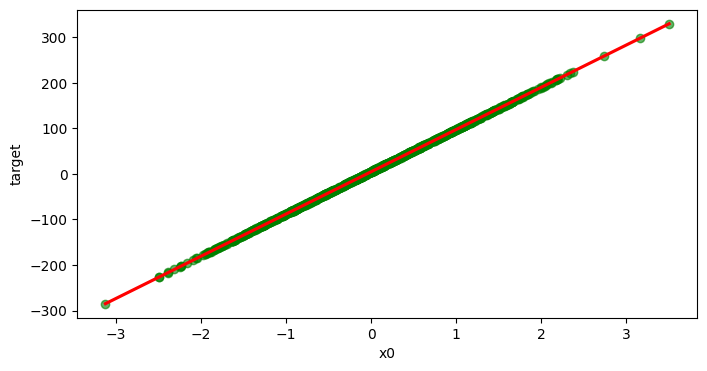

In [7]:
# Graficamos el dataset simple
plt.figure(figsize=(8,4))
sns.regplot(data=data_simple, x='x0', y='target', color='green', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.show()

In [8]:
# Paso 2: Generamos outliers fijando extreme_outliers
data_out_fijo = generate_outliers(
    df=data_simple,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=True,
    only_tails=False,
)

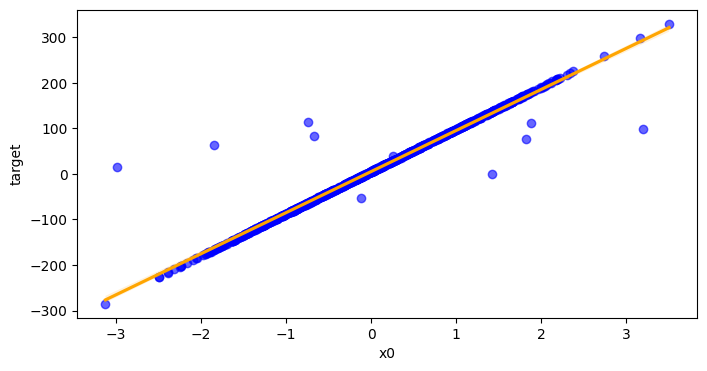

In [9]:
# Graficamos este dataset
plt.figure(figsize=(8,4))
sns.regplot(data=data_out_fijo, x='x0', y='target', color='blue', scatter_kws={'alpha': 0.6}, line_kws={'color': 'orange'})
plt.show()

In [10]:
# Paso 3: Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos

# Generamos los regresores
lin_reg = LinearRegression()
hub_reg = HuberRegressor()
rid_reg = RidgeCV()

models = [lin_reg, hub_reg, rid_reg]

In [11]:
# Generamos una función que calcule los errores
def calc_errores(data, modelo):
    # Aplicamos el tran_test_split
    X_train, X_test, y_train, y_test = train_test_split(data['x0'], data['target'], test_size=0.15, random_state=17) # Lo definimos para que sea constante el split

    # Realizamos la regresión lineal
    modelo.fit(np.array(X_train).reshape(-1,1), y_train)

    # Predecimos el target de test
    y_pred = modelo.predict(np.array(X_test).reshape(-1,1))

    # Calculamos RMSE
    rmse = mean_squared_error(y_test, y_pred)

    # Calculamos MAE
    mae = mean_absolute_error(y_test, y_pred)

    return (data, modelo, rmse, mae)

In [27]:
# Generamos un data frame para guardar los resultados
df = pd.DataFrame(columns=['dato', 'modelo','rmse','mae'])

# Generamos los rows de cada modelo
datos = [data_simple, data_out_fijo]
for data in datos:
    for modelo in models:
        row = calc_errores(data, modelo)
        df.loc[len(df)] = row
df['Tipo Dato'] = ['Simple', 'Simple', 'Simple', 'Outlier Fijo', 'Outlier Fijo', 'Outlier Fijo',]

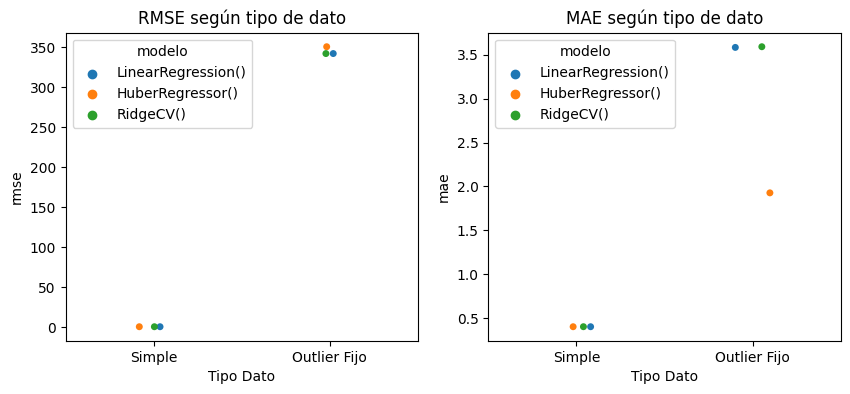

In [52]:
# Graficamos para comparar los errores vs tipo de dato
fig, axes = plt.subplots(1,2,figsize=(10,4))
sns.stripplot(x ='Tipo Dato', y ='rmse', data = df, hue ='modelo', ax=axes[0])
axes[0].set_title('RMSE según tipo de dato')
sns.stripplot(x ='Tipo Dato', y ='mae', data = df, hue ='modelo', ax=axes[1])
axes[1].set_title('MAE según tipo de dato')
plt.show()

- Se ve que con un nivel fijo y bajo (1%) de outliers, los regresores se comportan peor. Lo cual quiere decir que los errores aumentan.

In [55]:
# Paso 4: Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

# Generamos los diferentes datasets con porcentajes del 1% al 10%
porcentajes = np.linspace(0.01, 0.10, 10)
data_outliers = []
for p in porcentajes:
    data_out = generate_outliers(
        df=data_simple,
        columns=['x0'],
        percentage=p,
        extreme_outliers=True,
        only_tails=False,
    )
    data_outliers.append(data_out)

In [62]:
df = pd.DataFrame(columns=['dato', 'modelo','rmse','mae'])
for data in data_outliers:
    for modelo in models:
        row = calc_errores(data, modelo)
        df.loc[len(df)] = row
df['Porcentaje'] = [0.01,0.01,0.01,0.02,0.02,0.02, 0.03,0.03,0.03,0.04,0.04,0.04, 0.05,0.05,0.05,0.06,0.06,0.06,
        0.07,0.07,0.07,0.08,0.08,0.08, 0.09,0.09,0.09,0.1,0.1,0.1]

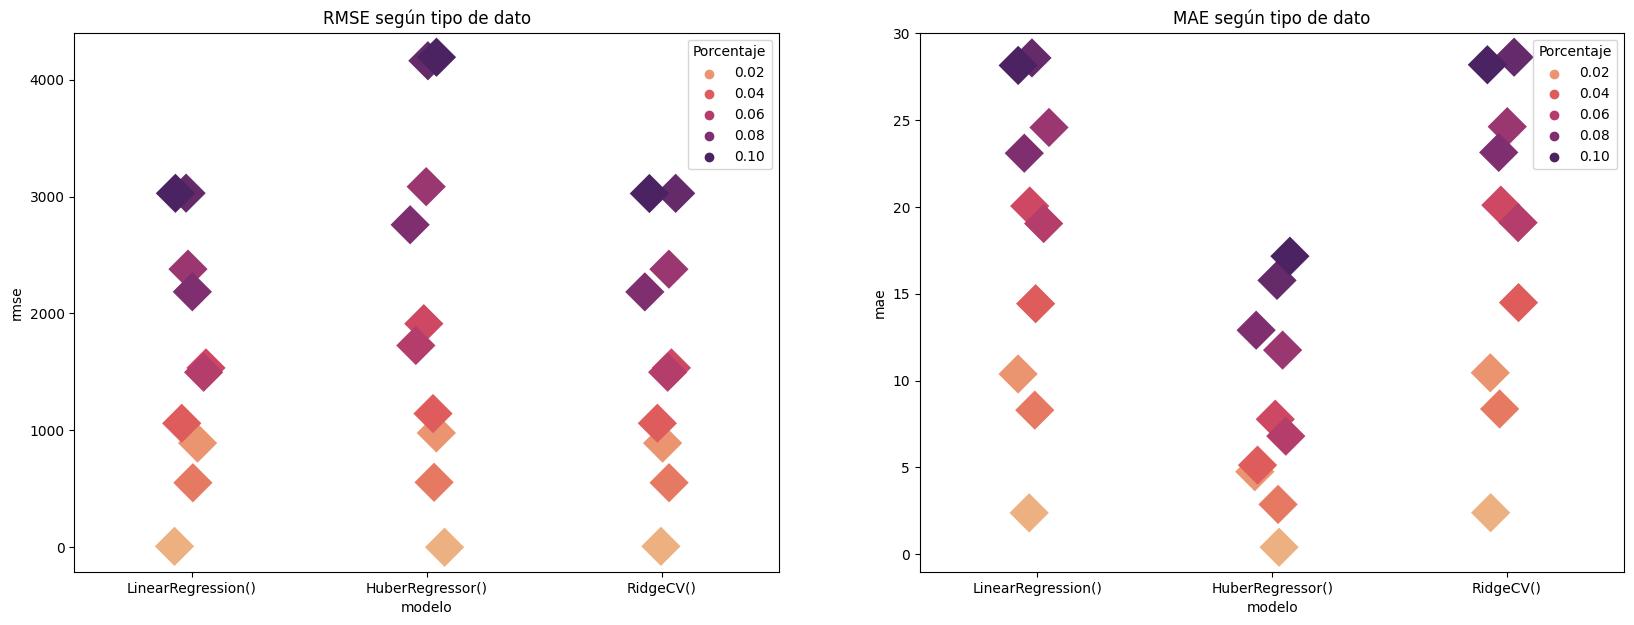

In [72]:
# Graficamos para comparar los errores vs tipo de dato y porcentaje
fig, axes = plt.subplots(1,2,figsize=(20,7))
sns.stripplot(x ='modelo', y ='rmse', data = df, hue ='Porcentaje', ax=axes[0], s=20, marker="D", palette='flare')
axes[0].set_title('RMSE según tipo de dato')
sns.stripplot(x ='modelo', y ='mae', data = df, hue ='Porcentaje', ax=axes[1], s=20, marker="D", palette='flare')
axes[1].set_title('MAE según tipo de dato')
plt.show()

### Insights encontrados
- Al aumentar el porcentaje de outliers, tanto RMSE como MAE auemntan.
- Al aumentar el porcentaje de outliers, para RMSE, los modelos LinearRegression y RidgeCV se comportan de manera similar pero el HuberRegressor tiene error más grande.
- Al aumentar el porcentaje de outliers, para MAE, el modelo HuberRegressor tiene un error menor que los otros dos.

## Problema de Clasificación

### Ejercicio 6

TBD

### Ejercicio 7

TBD